#Introdução
Nesse trecho vamos só mostra que o google.colab (%notebook) interpreta/roda código de python.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregando os Arquivos

Foi carregado dados referente a avaliações de filmes do site https://grouplens.org/datasets/movielens/

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#para carregar direto do repositorio o mesmo tem que estar em dominio publico.
filmes.columns = ["filmeid", "titulo", "genero"]
filmes.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
avaliacoes.shape

(100836, 4)

Renomenando as colunas do dado.

In [6]:
avaliacoes.columns = ["userarioid", "filmeid", "nota", "momento"]
avaliacoes.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Avalições estatísticas dos dados.


In [7]:
avaliacoes.describe()

,userarioid,filmeid,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
avaliacoes.query("filmeid==1").describe()

,userarioid,filmeid,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [10]:
avaliacoes.query("filmeid==1")["nota"].mean()

3.9209302325581397

In [11]:
avaliacoes.query("filmeid==1").mean()

userarioid    3.065302e+02
filmeid       1.000000e+00
nota          3.920930e+00
momento       1.129835e+09
dtype: float64

Extraindo variavel de um unico filme para poder avaliar separadamente

In [0]:
#o code não esta organizado, de uma forma mais correta seria extrair a variavel filme um e fazer todas as avalizaçoes deste filme separadamente 

In [13]:
avaliacoes_filme_1 = avaliacoes.query("filmeid==1")
avaliacoes_filme_1.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [14]:
notas_medias_por_filme = avaliacoes.groupby("filmeid")["nota"].mean()
#notas_medias_por_filme.head()
notas_medias_por_filme

filmeid
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [15]:
filmes

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
#para unir a tabela (nome do filme) com a média se faz a pergunta, será que todos os filmes obtiveram votação?

In [0]:
#filmes["nota_media"] = notas_medias_por_filme
#filmes.head()
#assumindo que os numeros de linhas batem entre os title e nota_media e a ordem é a mesma.
#não quero correr o risco de amanha os fimes não estarem em quantidade exata e ter que alterar o dataset

#DESAFIO 1
Encontre quais filmes não possuem notas

In [18]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeid")
filmes_com_media.head()

,filmeid,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [19]:
filmes_com_media.sort_values("nota")

,filmeid,titulo,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 02
Mudar o nome da coluna para média apos o join.


In [20]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeid,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 03
Colocar quantos avaliaçoes tiveram cada filme


In [21]:
avaliacoes.query("filmeid in [1,2,102084]")

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


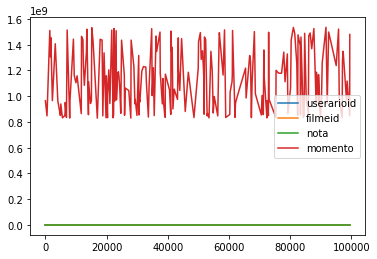

In [22]:
avaliacoes.query("filmeid == 1").plot()

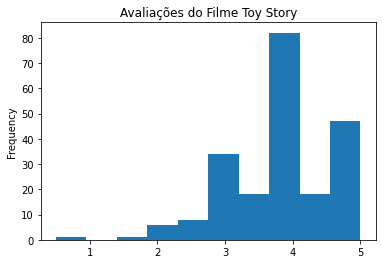

In [30]:
avaliacoes.query("filmeid == 1")['nota'].plot(kind='hist', title='Avaliações do Filme Toy Story')
#plt.title("Avaliação do Filme Toy Story")
#plt.show()

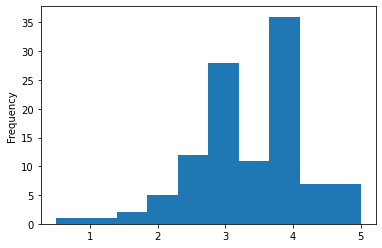

In [24]:
avaliacoes.query("filmeid == 2")['nota'].plot(kind='hist')

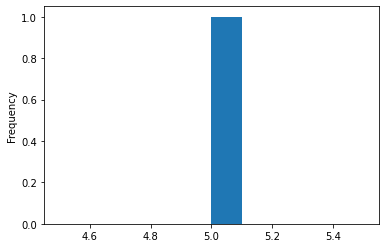

In [25]:
avaliacoes.query("filmeid == 102084")['nota'].plot(kind='hist')